 # TVS Case Study Problem-1

#### Importing libraries

In [1]:
import numpy
import pandas as pd
import tensorflow
import keras
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


#### Reading data from file

In [2]:
m_data=pd.read_csv('data.csv')

In [4]:
m_new=m_data
#m_new.drop(columns=['V3','V4'])

### Some predictions to use as a starting point

1. MOB(V5): The more business hours conducted with TVS, the more possibility of accepting.
2. Resident type(V6): Rented ones will accept more. Reason: Owned ones might be having loans(Possibilty of error here)
3. Product code(V7):
4. Number of advanced installements(V8): The more is it, the more is the acceptance 
5. Cost of asset(V9): Higher possibility of acceptance
6. Total loan amount of existing loan(V10): The more, the less is the chance of acceptance
7. Status of existing loan(V11): Mature has the max. chance of acceptance
8. Payment type of existing loan(V12): Cash might have a higher chance of acceptance
9. Rate of interest(V13): The more, the less is the chance of acceptance
10. Tenure of existing loan(V14): The more, the less is the chance of acceptance
11. Number of times bounced while repayment(V15): The more, the less is the chance of acceptance
12. Outstanding principle amount(V16): The more, the less is the chance of acceptance
13. Net Salary(V17): The more is it, the more is the acceptance
14. Number of PL loans taken outside TVS Credit(V18): Might follow a bell curve 
15. Number of Unsecured loans taken outside TVS Credit(V19): Might follow a bell curve 
16. Number of closed loans(V20): The more is it, the more is the acceptance
17. Number of Live loans(V21): The more is it, the less is the acceptance
18. Number of credit cards(V22): The more is it, the more is the acceptance
19. Number of Two Wheeler(TW) Loans(V23):  Might follow a bell curve
20. Number of Auto loans(V24): Might follow a bell curve
21. Loan amount of last loan taken(V25): The more is it, the less is the acceptance
22. Maximum amount sanctioned for any Two wheeler loan(V26): Might follow a bell curve
23. Maximum amount sanctioned for any housing loan(V27): Might follow a bell curve
24. Whether a customer only has Two wheeler loan(V28): 
25. Number of times enquired for secured loan in last 6 months(V29): The more is it, the more is the acceptance
26. Number of times enquired for Unsecured loan in last 6 months(V30): The more is it, the more is the acceptance
27. Total number of times enquired in last one year(V31): The more is it, the more is the acceptance



In [6]:
m_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282920 entries, 0 to 282919
Data columns (total 30 columns):
V1     282920 non-null int64
V2     282920 non-null object
V5     282920 non-null int64
V6     282920 non-null object
V7     282920 non-null object
V8     282920 non-null int64
V9     282920 non-null int64
V10    282920 non-null int64
V11    282920 non-null object
V12    282920 non-null object
V13    282920 non-null float64
V14    282920 non-null int64
V15    282920 non-null int64
V16    282920 non-null int64
V17    282920 non-null float64
V18    282920 non-null int64
V19    282920 non-null int64
V20    282920 non-null int64
V21    282920 non-null int64
V22    282920 non-null int64
V23    282920 non-null int64
V24    282920 non-null int64
V25    282920 non-null int64
V26    282920 non-null float64
V27    282920 non-null int64
V28    282920 non-null int64
V29    282920 non-null int64
V30    282920 non-null int64
V31    282920 non-null int64
V32    282920 non-null int64
dtypes: 

## Data Visualization and Data Cleaning

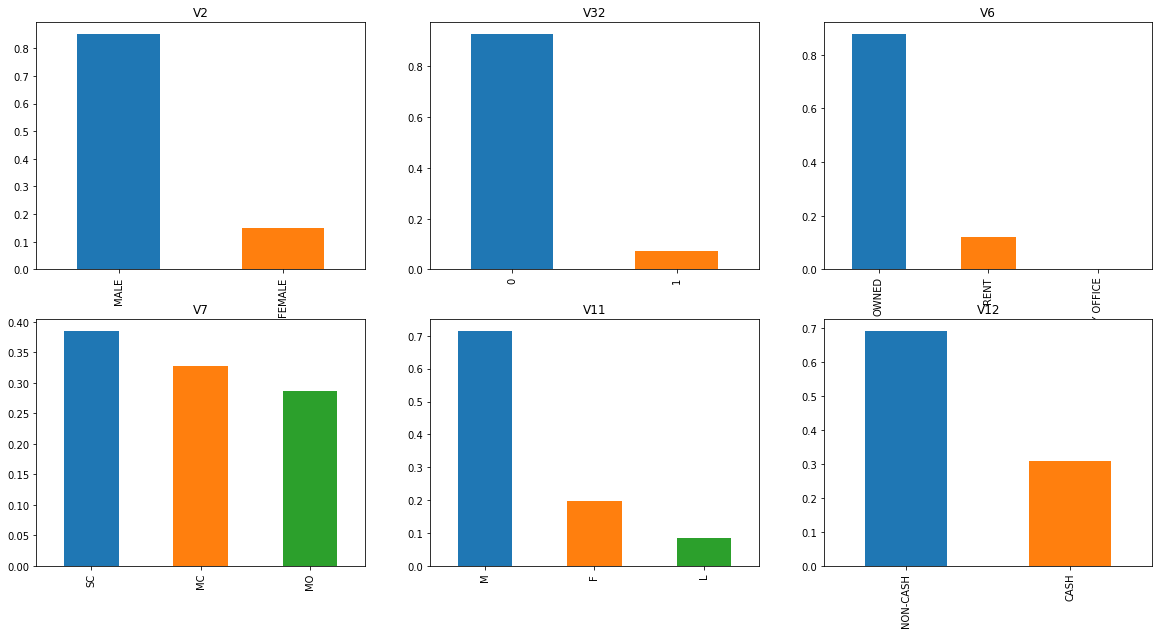

In [9]:
plt.subplot(231)
train=m_data
train['V2'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'V2')

#plt.subplot(232)
#train['V3'].value_counts(normalize=True).plot.bar(title= 'V3')

plt.subplot(233)
train['V6'].value_counts(normalize=True).plot.bar(title= 'V6')

plt.subplot(234)
train['V7'].value_counts(normalize=True).plot.bar(title= 'V7')

plt.subplot(235)
train['V11'].value_counts(normalize=True).plot.bar(title= 'V11')

plt.subplot(236)
train['V12'].value_counts(normalize=True).plot.bar(title= 'V12')

plt.subplot(232)
train['V32'].value_counts(normalize=True).plot.bar(title='V32')
#plt.show()

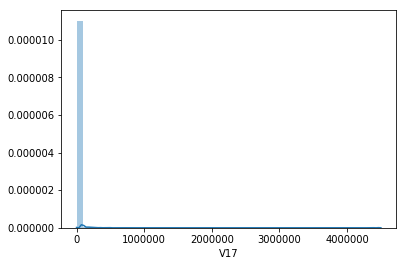

In [11]:
#train.drop(train.index[10716])
#plt.subplot(600)
sns.distplot(train['V17'])

#train['V17'].hist(bins=20)

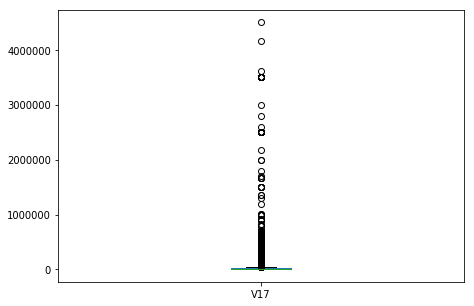

In [12]:
plt.subplot(122)
train['V17'].plot.box(figsize=(16,5))

In [13]:
train['V17'].shape

(282920,)

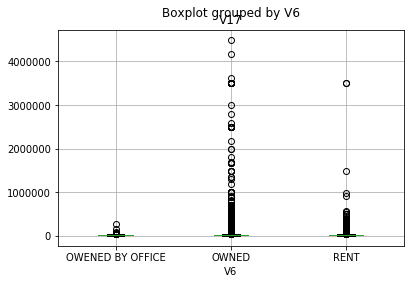

In [14]:
train.boxplot(column='V17', by = 'V6')

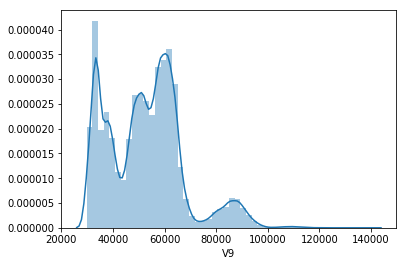

In [15]:
sns.distplot(train['V9'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f4aaa550>,
      dtype=object)

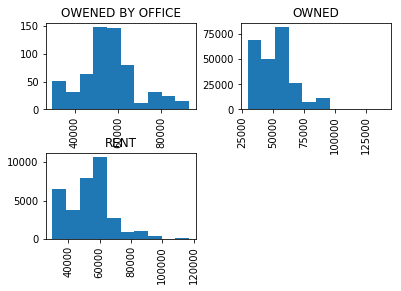

In [16]:
train.hist(column='V9', by = 'V6')

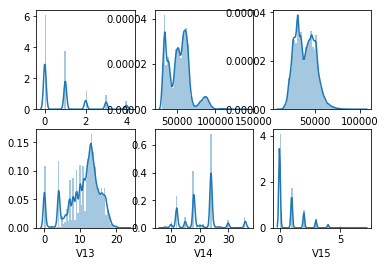

In [17]:
k=231;


for i in range(8,11):
    plt.subplot(k)
    #plt.axis('off')
    sns.distplot(train['V'+str(i)])
    k=k+1
    
for i in range(13,16):
    plt.subplot(k)
    #plt.axis('off')
    sns.distplot(train['V'+str(i)])
    k=k+1
    
#plt.subplot(k)
#sns.distplot(train['V11'])    


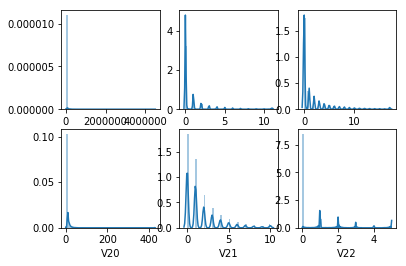

In [18]:
k=231
for i in range(17,23):
    plt.subplot(k)
    sns.distplot(train['V'+str(i)])
    k=k+1


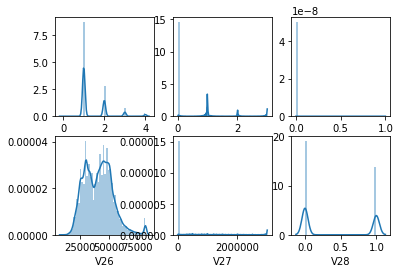

In [19]:
k=231
for i in range(23,29):
    plt.subplot(k)
    sns.distplot(train['V'+str(i)])
    k=k+1


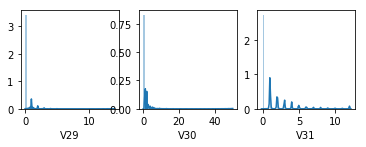

In [20]:
k=231
for i in range(29,32):
    plt.subplot(k)
    sns.distplot(train['V'+str(i)])
    k=k+1


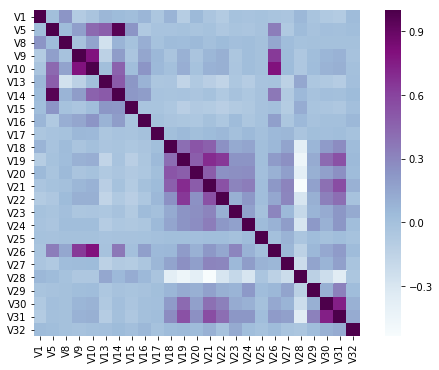

In [21]:
matrix = train.corr()
matrix
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=False)

In [22]:
train.isnull().sum()

V1     0
V2     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
dtype: int64

In [23]:
train['V17_log'] = np.log(train['V17'])

/home/abhilash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [24]:
train[train['V17']==0]

,V1,V2,V5,V6,V7,V8,V9,V10,V11,V12,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V17_log
48,49,MALE,18,OWNED,MC,0,81675,49000,M,NON-CASH,...,3,237000,82360.01,3000000,0,1,1,7,0,-inf
3704,3705,MALE,18,OWNED,MO,0,40300,30000,L,CASH,...,0,30000,30000.00,0,1,0,0,0,0,-inf
3854,3855,MALE,12,OWNED,MC,0,60300,28000,M,CASH,...,0,28000,28000.00,0,1,0,0,0,0,-inf
7608,7609,MALE,12,OWNED,MO,0,33800,21180,M,CASH,...,0,21180,21180.00,0,1,0,0,0,0,-inf
8163,8164,MALE,24,OWNED,SC,0,57435,46900,M,NON-CASH,...,0,11370,46900.00,0,0,0,0,0,0,-inf
8353,8354,MALE,18,RENT,MC,1,49267,29000,M,NON-CASH,...,0,20000,32000.00,0,0,0,0,3,0,-inf
8354,8355,MALE,15,OWNED,MO,1,30760,21510,F,NON-CASH,...,1,120000,21510.00,0,0,0,0,0,0,-inf
13529,13531,MALE,15,OWNED,MO,1,32100,26500,F,NON-CASH,...,1,26500,26500.00,0,0,0,0,0,0,-inf
13810,13812,MALE,18,OWNED,MO,3,30990,30400,M,NON-CASH,...,0,54000,30400.00,0,0,0,0,0,0,-inf
15443,15445,MALE,24,OWNED,MC,2,64100,60521,M,NON-CASH,...,0,60521,60521.00,0,1,0,0,0,0,-inf


In [25]:
train.loc[train['V17'] == 0] = 1

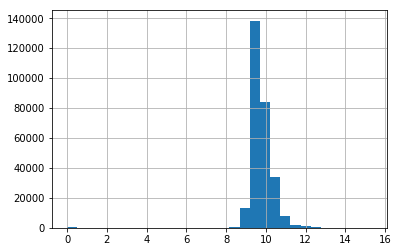

In [27]:
train['V17_log'] = np.log(train['V17'])
train['V17_log'].hist(bins=30)

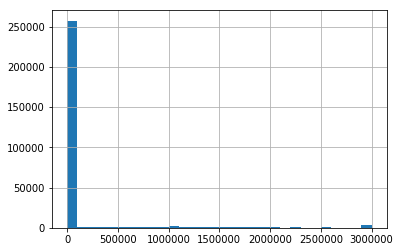

In [28]:
train['V27'].hist(bins=30)

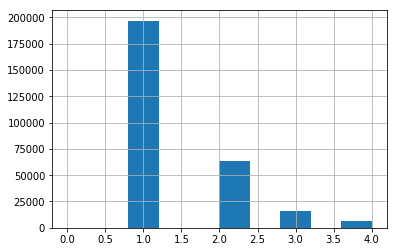

In [29]:
train['V23'].hist()

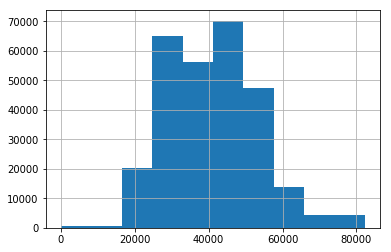

In [30]:
train['V26'].hist()

# Feature Importance

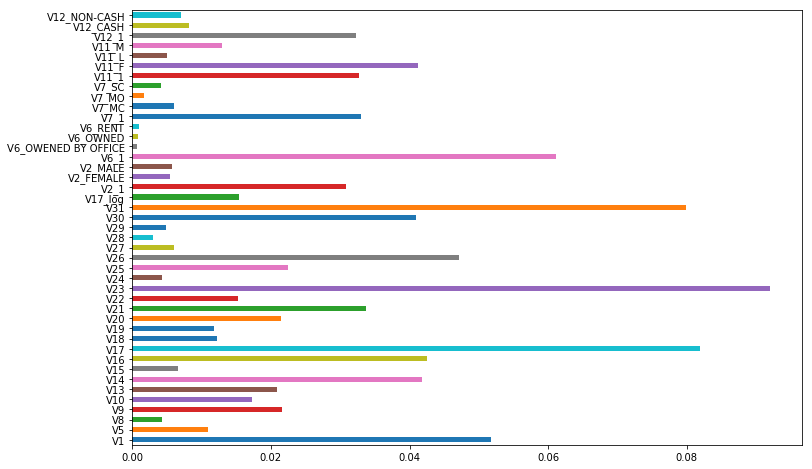

In [50]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

In [109]:
train2=train

In [32]:
X = train2.drop('V32', 1)
y = train2.V32

In [105]:
X = pd.get_dummies(X)
train2 = pd.get_dummies(train2)

In [34]:
X.shape, train2.shape

((282920, 43), (282920, 44))

In [93]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((198044, 43), (84876, 43), (198044,), (84876,))

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Different Models

## Logistic Regression

In [147]:
from sklearn.model_selection import StratifiedKFold

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    #print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    #print('accuracy_score', score)
    i+=1
    
print("\n Training accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(x_cv)
print("Accuracy: ",accuracy_score(y_cv, pred_test))


pred = model.predict_proba(xvl)[:,1]


 Training accuracy:  0.926915728820118
Accuracy:  0.9273292803619397


# Decision Tree

In [146]:
from sklearn import tree
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    #print('accuracy_score',score)
    i+=1
    
print("\nTraining accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(x_cv)
print("\nAccuracy: ", accuracy_score(y_cv, pred_test))




Training accuracy:  0.8650926097101527

Accuracy:  0.9739148876007352


[[77298  1209]
 [ 1005  5364]]


Text(33,0.5,'True')

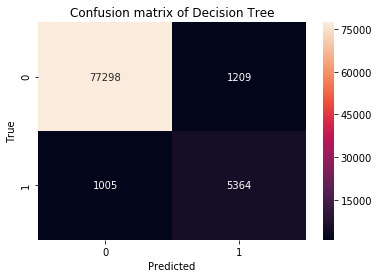

In [137]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_test)
print(cm)
# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

# Random Forest


In [145]:
from sklearn.ensemble import RandomForestClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    #print('accuracy_score',score)
    i+=1
    
print("\nTraining accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(x_cv)
print("\n Accuracy: ", accuracy_score(y_cv, pred_test))


Training accuracy:  0.9274176466695179

 Accuracy:  0.9275295725529007


## XGBoost

In [144]:
from xgboost import XGBClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    i+=1
    
print("\nTraining Accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(x_cv)
print("Accuracy: ", accuracy_score(y_cv, pred_test))

/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig


Training Accuracy:  0.9274423890208567
Accuracy:  0.9273528441491117


/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Deep learning

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.models import model_from_json

num_col=44
model = Sequential()

model.add(Dense(60, input_dim=num_col-1, kernel_initializer='normal', activation='relu'))

model.add(Dense(32, kernel_initializer='normal', activation='relu'))

model.add(Dense(16, kernel_initializer='normal', activation='relu'))

model.add(Dense(8, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



model.fit(x_train, y_train, epochs = 100, batch_size=100)


Epoch 1/100
198044/198044 [==============================] - 4s 18us/step - loss: 0.2711 - acc: 0.9267
Epoch 2/100
198044/198044 [==============================] - 3s 14us/step - loss: 0.2646 - acc: 0.9273
Epoch 3/100
198044/198044 [==============================] - 3s 15us/step - loss: 0.2612 - acc: 0.9275
Epoch 4/100
198044/198044 [==============================] - 3s 15us/step - loss: 0.2582 - acc: 0.9275
Epoch 5/100
198044/198044 [==============================] - 3s 16us/step - loss: 0.2641 - acc: 0.9271
Epoch 6/100
198044/198044 [==============================] - 3s 15us/step - loss: 0.2565 - acc: 0.9275
Epoch 7/100
198044/198044 [==============================] - 3s 15us/step - loss: 0.2556 - acc: 0.9275
Epoch 8/100
198044/198044 [==============================] - 3s 15us/step - loss: 0.2567 - acc: 0.9275
Epoch 9/100
198044/198044 [==============================] - 3s 15us/step - loss: 0.2566 - acc: 0.9275
Epoch 10/100
198044/198044 [==============================] - 3s 17us/ste

In [142]:
scores = model.evaluate(x_cv, y_cv)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

84876/84876 [==============================] - 1s 17us/step

acc: 92.73%
